# Quick 1 start fro v.1.1.2

This is a quick start tutorial, please read the full [userguide](https://jetset.readthedocs.io/en/1.1.2/user_guide/user_guide.html)

# Basic features and SSC

for more info  [ssc section of the userguide](https://jetset.readthedocs.io/en/1.1.2/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html)

## Basic setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from jetset.jet_model import Jet
my_jet=Jet(name='my_jet',electron_distribution='lppl',)

In [3]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
spitkov: spitkov
lppl_pile_up: log-parabola with low-energy powerlaw branch and pile-up
bkn_pile_up: broken powerlaw and pileup


In [4]:
my_jet.show_pars()


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

In [5]:
my_jet.parameters.par_table


name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
str16,str19,object,float64,float64,float64,bool,bool
gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
B,magnetic_field,G,1.000000e-01,0.000000e+00,--,False,False


In [6]:
my_jet.show_model()



-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: my_jet  

electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- --------

## Setting the parameters

assume you want to change some of the parameters in your model, you can use two methods:

using the `set_par()` method

In [7]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

or you can access directly the paramter 

In [8]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## Investigating the electron distribution


In [9]:
my_jet.show_electron_distribution()


-------------------------------------------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
               B      magnetic_field               G 2.000000e-01     0.000000e+00               -- False  False
               N    emitters_density         1 / cm3 1.000000e+03     0.000000e+00               -- False  False
               R         region_size              cm 1.000000e+15     1.000000e+03     1.000000e+30 False  False
             R_H     region_position              cm 1.000000e+17     0.000000e+00               -- False   True
        beam_obj             beaming Lorentz

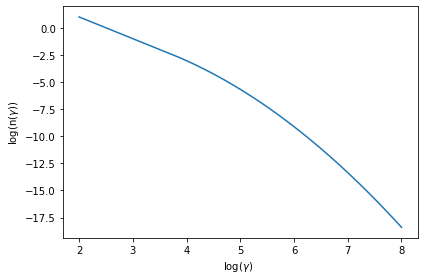

In [10]:
p=my_jet.electron_distribution.plot()


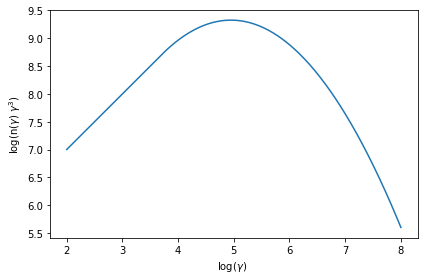

In [11]:
p=my_jet.electron_distribution.plot3p()


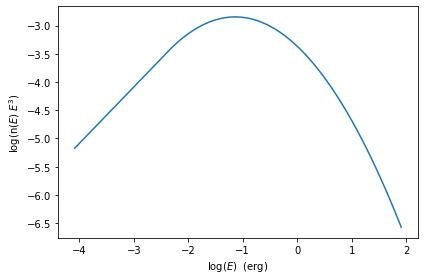

In [12]:
p=my_jet.electron_distribution.plot3p(energy_unit='erg')


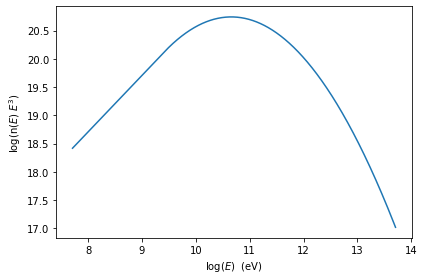

In [13]:
p=my_jet.electron_distribution.plot3p(energy_unit='eV')


In [14]:
my_jet.electron_distribution.gamma_e

array([1.00000000e+02, 1.01400815e+02, 1.02801630e+02, ...,
       9.72747224e+07, 9.86373612e+07, 1.00000000e+08])

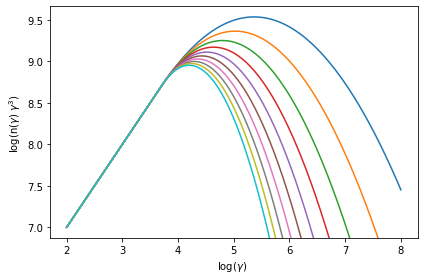

In [15]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    if p is None:
        p=my_jet.electron_distribution.plot3p()
    else:
        p=my_jet.electron_distribution.plot3p(p)

## Using log values for electron distribution parameters


In [16]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- -----------

## Evaluate and plot the model

In [17]:
timeit my_jet.eval()


246 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


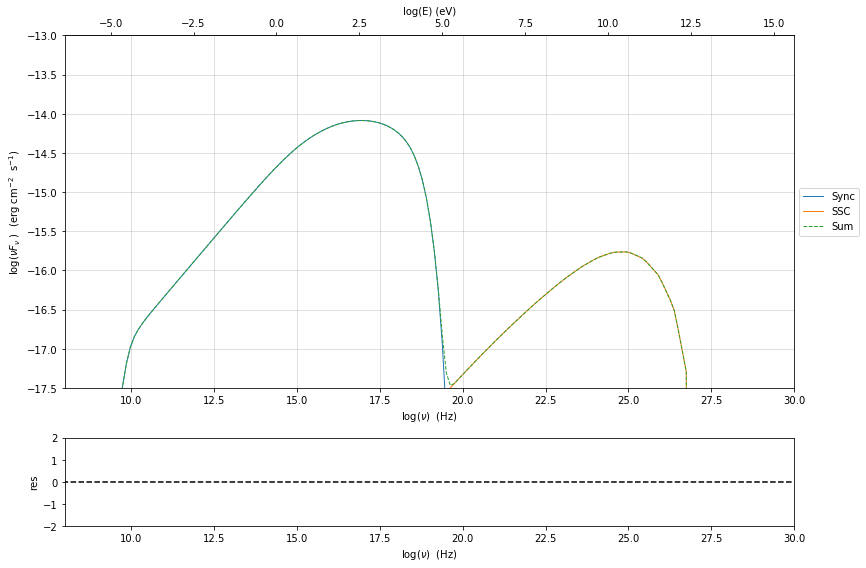

In [18]:
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

you can change the size of the grid for the IC frequencies (this will increase the computation time)

In [19]:
my_jet.set_IC_nu_size(100)


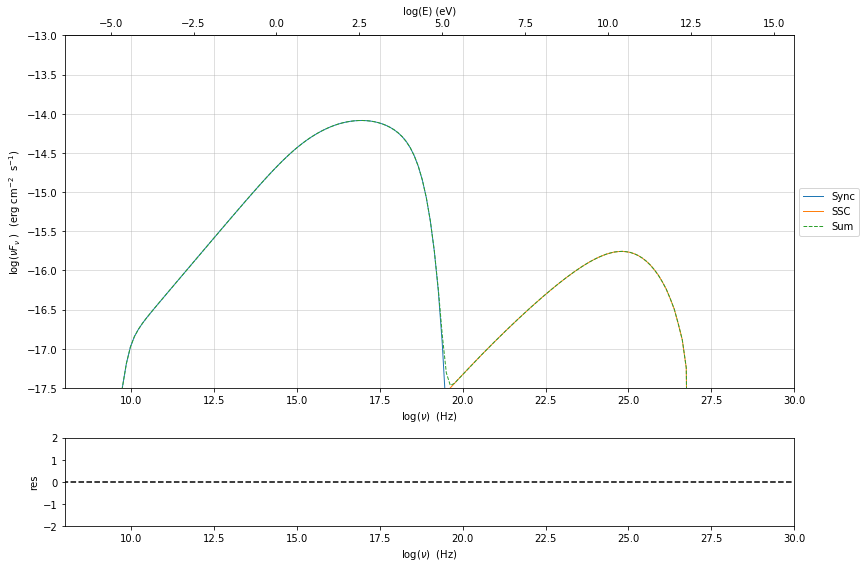

In [20]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Plotting in the src frame (istropic luminosities)

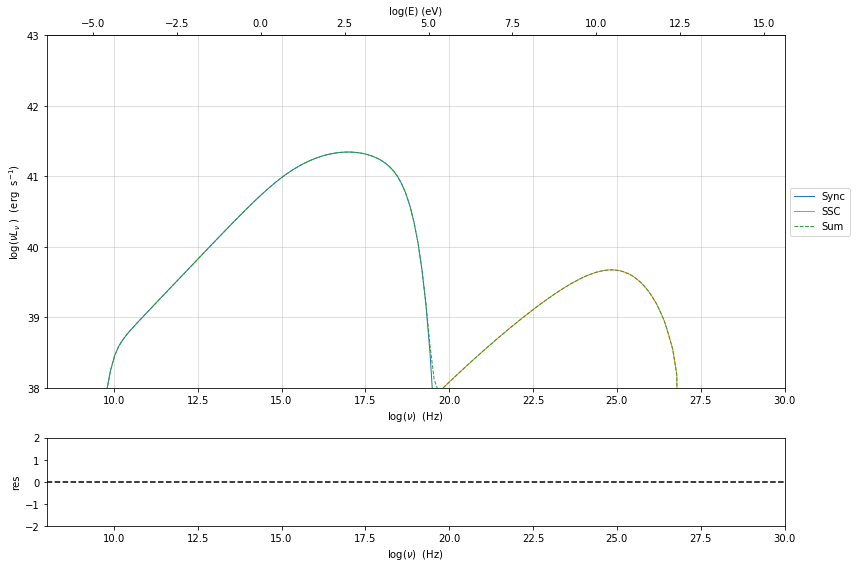

In [21]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

## Comparing how the model reacts as we change the parameters

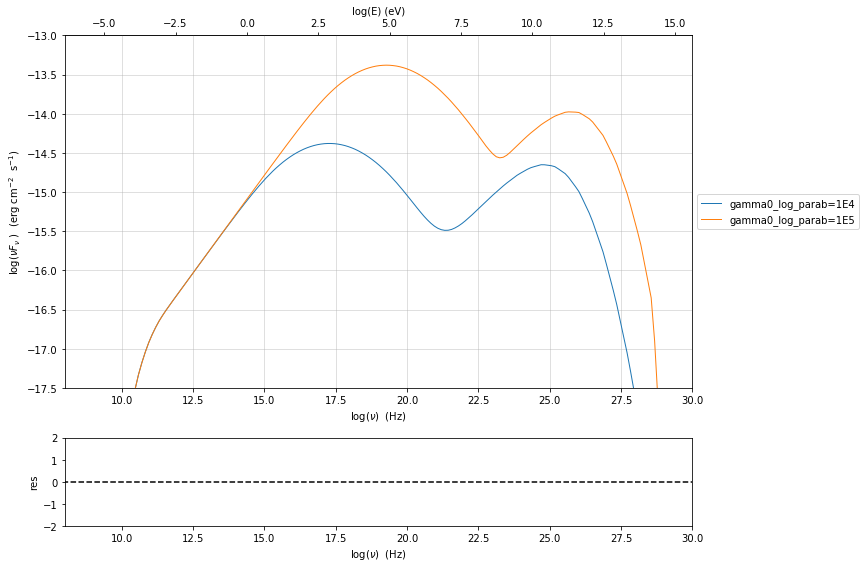

In [22]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

## Saving images

In [23]:
my_plot.save('jet1.png')


## Saving and loading models

In [24]:
my_jet.save_model('test_model.pkl')


In [25]:
my_jet=Jet.load_model('test_model.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.000000e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+08     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+03     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+05     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 3.162278e+14     1.000000e+03     1.000000e

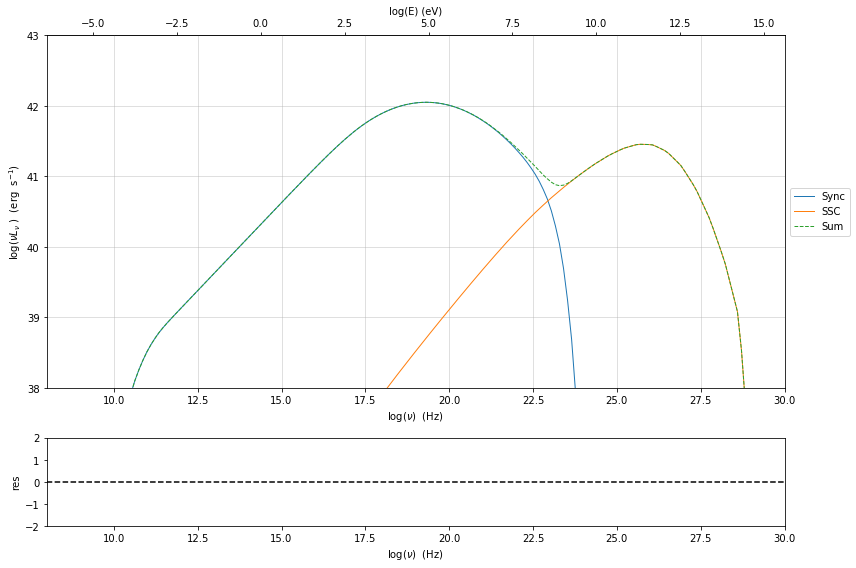

In [26]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=43,y_min=38,x_min=8)

## Switching on/off the particle distribution normalization


As default the electron distributions are normalized, i.e. are multiplied by a constant ``N_0``, in such a way that :

\begin{aligned}
\int_{\gamma_{min}}^{\gamma_{max}} n(\gamma) d\gamma =1
\end{aligned}
it means the the value `N`, refers to the actual density of emitters.
If you want to chance this behavior, you can start looking at the sate of `Norm_distr` flag with the following command

In [27]:
my_jet.Norm_distr

1

and then you can switch off the normalization withe command

In [28]:
my_jet.switch_Norm_distr_OFF()

OR

In [29]:
my_jet.Norm_distr=0

or set back the normalization on with

In [30]:
my_jet.switch_Norm_distr_ON()

OR

In [31]:
my_jet.Norm_distr=1

## Setting the number density of emitters fron observed fluxes or luminosities

It is possible to set the vlue of `N` in order that the observed synchrotron flux at a given frequency matches a desired value. 
For example, assume that we wish to set `N` in order that  the synchrotron flux at $10^{15}$ Hz is exactly matching the desired value of $10^{-14}$ ergs cm-2 s-1. We can accomplish this by using the method `Jet.get_par_by_name()` as follows: 

In [32]:
my_jet=Jet(name='test',electron_distribution='lppl')
my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

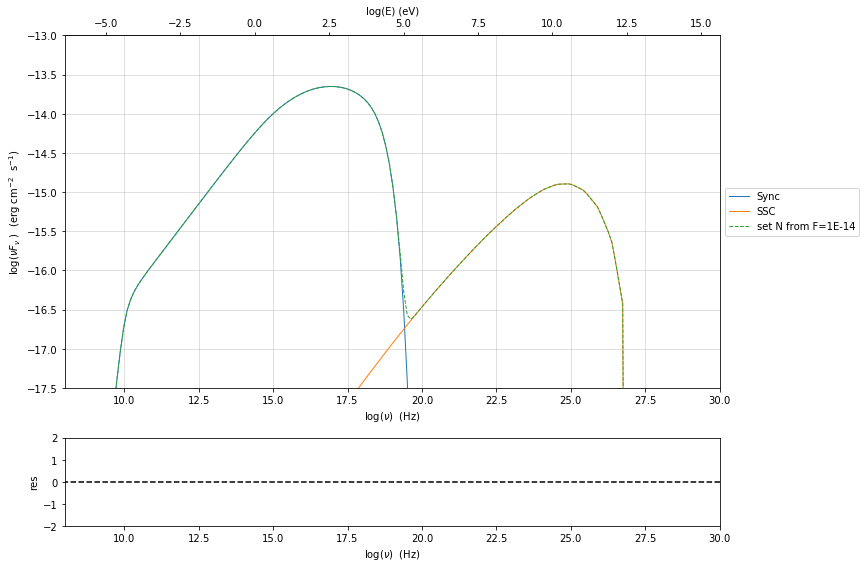

In [33]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.rescale(y_max=-13,y_min=-17.5,x_min=8)

Alternatively, the value of N  can be obtained using the rest-frame luminosity and  frequency, using the method `Jet.set_N_from_nuLnu()`

In [34]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

where `L_0` is the source rest-frame istropic luminosity in erg/s at the rest-frame frequency ``nu_0`` in Hz.


## setting the beaming factor and expression

It is possible to set the beaming factor according to the relativistic BulkFactor and viewing angle, this can be done by setting the ``beaming_expr`` kw in the Jet constructor, possible choices are

* `delta` to provide directly the beaming factor (default)
* `bulk_theta` to provide the BulkFactor and the jet  viewing angle 

In [40]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.parameters.show_pars()
print()
print('beaming=',my_jet.get_beaming())


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

In [42]:
my_jet.parameters.BulkFactor.val=100
my_jet.parameters.theta.val=90

print('beaming=',my_jet.get_beaming())


beaming= 0.009999999999999995


In [43]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')
my_jet.parameters.beam_obj.val=10

In [44]:
my_jet.parameters.show_pars()
my_jet.get_beaming()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 2.000000e+00     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.000000e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.000000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.000000e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.000000e+15     1.000000e+03     1.000000e

10.0

## Accessing individual spectral components

In [45]:
my_jet.eval()
my_jet.list_spectral_components()


Sum
Sync
SSC


In [46]:
my_jet.spectral_components.Sync.SED.nuFnu

<Quantity [1.00000000e-120, 1.00000000e-120, 1.00000000e-120,
           1.00000000e-120, 1.00000000e-120, 1.00000000e-120,
           1.00000000e-120, 1.87789044e-117, 1.20438474e-027,
           2.85666295e-027, 6.83812329e-027, 1.65590092e-026,
           4.06706809e-026, 1.01536923e-025, 2.57909436e-025,
           6.65782283e-025, 1.74060958e-024, 4.58519231e-024,
           1.21108943e-023, 3.20059187e-023, 8.45930921e-023,
           2.23586265e-022, 5.90956491e-022, 1.56194512e-021,
           4.12834155e-021, 1.09114800e-020, 2.88390483e-020,
           7.62103729e-020, 2.01224033e-019, 5.28777080e-019,
           1.35737315e-018, 3.21918912e-018, 6.48818242e-018,
           1.05132243e-017, 1.43023742e-017, 1.76874342e-017,
           2.10472172e-017, 2.45751884e-017, 2.84399718e-017,
           3.27794336e-017, 3.77129909e-017, 4.33548243e-017,
           4.98237642e-017, 5.72494139e-017, 6.57747644e-017,
           7.55680420e-017, 8.68173778e-017, 9.97386430e-017,
        

In [47]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [48]:
t_obs

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,1e-120,1e-120,1e-120
1320088.4008314167,1e-120,1e-120,1e-120
1742633.3860096508,1e-120,1e-120,1e-120
2300430.1197729167,1e-120,1e-120,1e-120
3036771.1180354604,1e-120,1e-120,1e-120
4008806.328898465,1e-120,1e-120,1e-120
5291978.7359584365,1e-120,1e-120,1e-120
6985879.746785249,1.877890435935217e-117,1.877890435935217e-117,1e-120


for more details (how to get spectral components for  `src` and `obs` frame, or how to use astropy units for units conversion see for [userguide section of spectral components](https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html#accessing-individual-spectral-components)

## Energetic report


In [49]:
my_jet.energetic_report(verbose=False)
my_jet.energetic_report_table


name,type,units,val
str14,str29,object,float64
U_e,Energy dens. blob rest. frame,erg / cm3,1.740434e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,7.516095e+03
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,6.951576e-310
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.506770e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,5.506770e-01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


# External Compton 


The external Compton implementation  gives you the possibility to use a double approach
 
* transformation of the external  fields to the blob rest frame :cite:`Dermer2000`

* transformation of the electron emitting distribution from the blob restframe to
  disk/BH restframe :cite:`Dermer95` :cite:`GKM01`

Regading the single external radiavite fiels 
 
* Implementation of Broad Line Region radiative field using the approach of :cite:`Donea2003` 

* Dusty torus implemented as a uniform BB field within `R_DT`

* accretion disk can be set a single BB or a multitemperature BB

* CMB 

Please read  the usere guide for more informations see the [EC userguide section](https://jetset.readthedocs.io/en/1.1.2/user_guide/jet_model_phys_EC/Jet_example_phys_EC.html)

![EC model](images/jetset_EC_scheme.png)

In [7]:
from jetset.jet_model import Jet
my_jet=Jet(name='BLR example',electron_distribution='bkn',beaming_expr='bulk_theta')
my_jet.add_EC_component(['EC_BLR','EC_Disk'],disk_type='BB')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

accretion disk:
 disk Type: BB
 L disk: 1.000000e+45 (erg/s)
 T disk: 1.000000e+05 (K)
 nu peak disk: 8.171810e+15 (Hz)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower

In [8]:
my_jet.set_par('L_Disk',val=1E46)
my_jet.set_par('T_Disk',val=5E45)
my_jet.set_par('gmax',val=5E4)
my_jet.set_par('gmin',val=2.)
my_jet.set_par('R_H',val=3E17)

my_jet.set_par('p',val=1.5)
my_jet.set_par('p_1',val=3.2)
my_jet.set_par('R',val=3E15)
my_jet.set_par('B',val=1.5)
my_jet.set_par('z_cosm',val=0.6)
my_jet.set_par('BulkFactor',val=20)
my_jet.set_par('theta',val=1)
my_jet.set_par('gamma_break',val=5E2)
my_jet.set_N_from_nuLnu(nu_src=3E13,nuLnu_src=5E45)
my_jet.set_IC_nu_size(100)

we can change the disk type from single temperature BB to multi temperature BB

In [9]:
my_jet.add_EC_component(disk_type='MultiBB')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization  True
 log-values  False

accretion disk:
 disk Type: MultiBB
 L disk: 1.000000e+46 (erg/s)
 T disk: 5.015768e+04 (K)
 nu peak disk: 4.098790e+15 (Hz)
 Sw radius 2.953539e+14 (cm)
 L Edd. 1.666723e+47 (erg/s)
 accr_rate: 2.205171e+00 (M_sun/yr)
 accr_rate Edd.: 3.675409e+01 (M_sun/yr)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
ext

we can add alos the dusty torus emission

In [10]:
my_jet.add_EC_component('DT')
my_jet.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: BLRexample  

electrons distribution:
 type: bkn  
 gamma energy grid size:  1001
 gmin grid : 2.000000e+00
 gmax grid : 5.000000e+04
 normalization  True
 log-values  False

accretion disk:
 disk Type: BB
 L disk: 1.000000e+46 (erg/s)
 T disk: 5.015768e+04 (K)
 nu peak disk: 4.098790e+15 (Hz)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_BLR, state: on
   name:Disk, state: on
   name:EC_Disk, state: on
   name:DT, state: on
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.0000

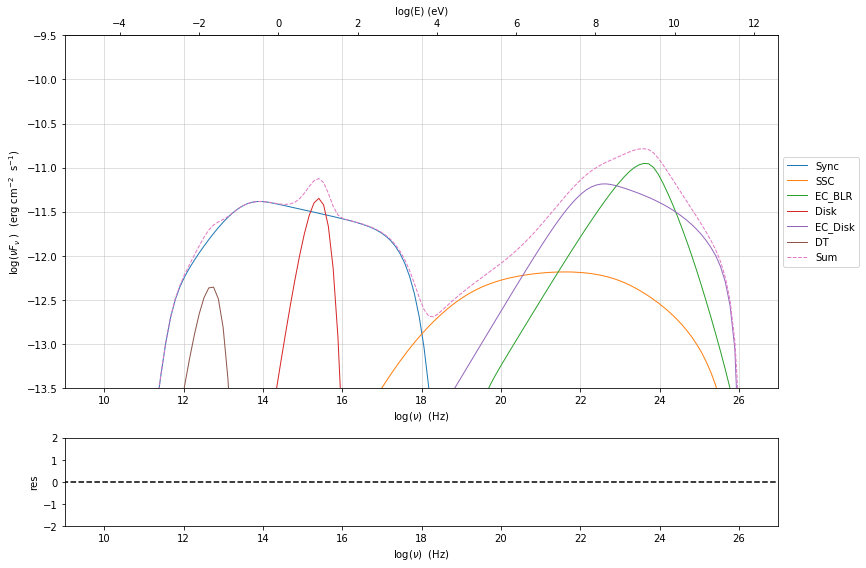

In [11]:
my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-13.5,y_max=-9.5,x_min=9,x_max=27)

## Changing the external field transformation, the case of IC against the CMB

In [12]:
my_jet.set_external_field_transf('blob')

my_jet.set_external_field_transf('disk')


In [13]:
from jetset.jet_model import Jet

my_jet=Jet(name='test_equipartition',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.set_par('R',val=1E21)
my_jet.set_par('z_cosm',val= 0.651)
my_jet.set_par('B',val=2E-5)
my_jet.set_par('gmin',val=50)
my_jet.set_par('gamma0_log_parab',val=35.0E3)
my_jet.set_par('gmax',val=30E5)
my_jet.set_par('theta',val=12.0)
my_jet.set_par('BulkFactor',val=3.5)
my_jet.set_par('s',val=2.58)
my_jet.set_par('r',val=0.42)
my_jet.set_N_from_nuFnu(5E-15,1E12)
my_jet.add_EC_component('EC_CMB')
my_jet.eval()

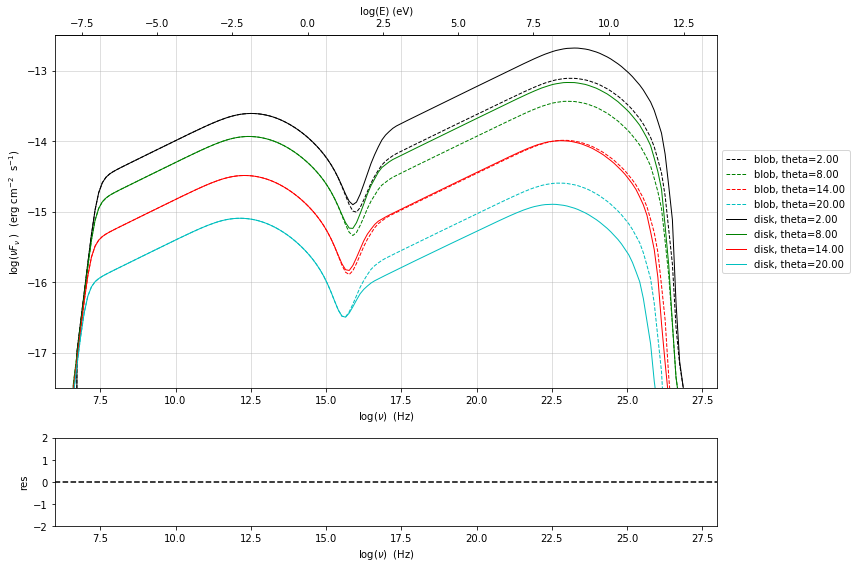

In [14]:
from jetset.plot_sedfit import PlotSED
p=PlotSED()

my_jet.set_external_field_transf('blob')
c= ['k', 'g', 'r', 'c']
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='blob, theta=%2.2f'%theta,line_style='--',color=c[ID])

my_jet.set_external_field_transf('disk')
for ID,theta in enumerate(np.linspace(2,20,4)):
    my_jet.parameters.theta.val=theta
    my_jet.eval()
    my_jet.plot_model(plot_obj=p,comp='Sum',label='disk, theta=%2.2f'%theta,line_style='',color=c[ID])

p.rescale(y_min=-17.5,y_max=-12.5,x_max=28)

We can now compare the different beaming pattern for the EC emission if the CMB, and realize that the beaming pattern is different. 
This is very important in the case of radio galaxies. The `src` transformation is the one to use in the case of radio galaies or 
misaligned AGNs, and  gives a more accurate results.
Anyhow, be careful that  this  works only for isotropic external fields, suchs as the CMB,  or BLR 
seed photons whitin the Dusty torus radius, and BLR radius, respectively


## Equipartition

It is also possible to set our jet at the equipartition, that is achieved not using analytical approximation, but by numerically finding the equipartition value over a grid.
We have to provide the value of the observed flux (`nuFnu_obs`) at a given observed frequency (`nu_obs`), the minimum value of B (`B_min`), and the number of grid points (`N_pts`)


B grid min  1e-09
B grid max  1.0
grid points 50


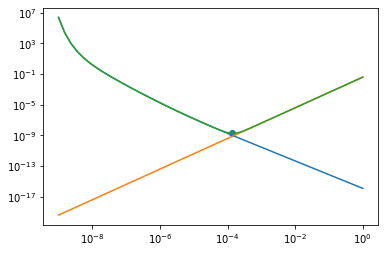

setting B to  0.0001389495494373139
setting N to  9.13927847193837e-06
      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 5.000000e+01     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 3.000000e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 9.139278e-06     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.580000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 4.200000e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 3.500000e+04     1.000000e+00     1.000000e+09 False  False
               R         

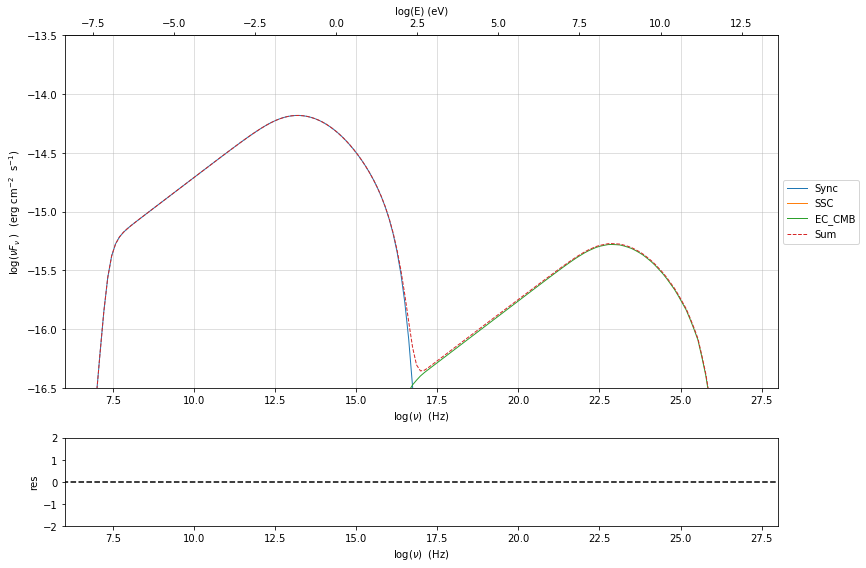

In [15]:
my_jet.parameters.theta.val=12
B_min,b_grid,U_B,U_e=my_jet.set_B_eq(nuFnu_obs=5E-15,nu_obs=1E12,B_min=1E-9,N_pts=50,plot=True)
my_jet.show_pars()

my_jet.eval()
p=my_jet.plot_model()
p.rescale(y_min=-16.5,y_max=-13.5,x_max=28)